In this tutorial, I go through a classification method using neural networks. I will use Keras library to perform this task

In [1]:
# importing libraries
# use juputer magic command to see viasualizations inside the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#reading a dataframe from .csv file using pandas
raw_df = pd.read_csv('Churn_Modelling.csv', index_col=0)

# DATA EXPLORATORY PART

In [3]:
raw_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# there are 10000 entries and nothing is missing. We can check if no value is missing with
raw_df.isnull().values.any()

False

In [4]:
# customerid and their surname do not provide useful data for our classification problem. I divide the dataset to X and y
X = raw_df[raw_df.columns[2:-1]]
y = raw_df['Exited']

In [7]:
X['Geography'].value_counts() # data is from three countaries

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

C:\Users\AhmadReza\.conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AhmadReza\.conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


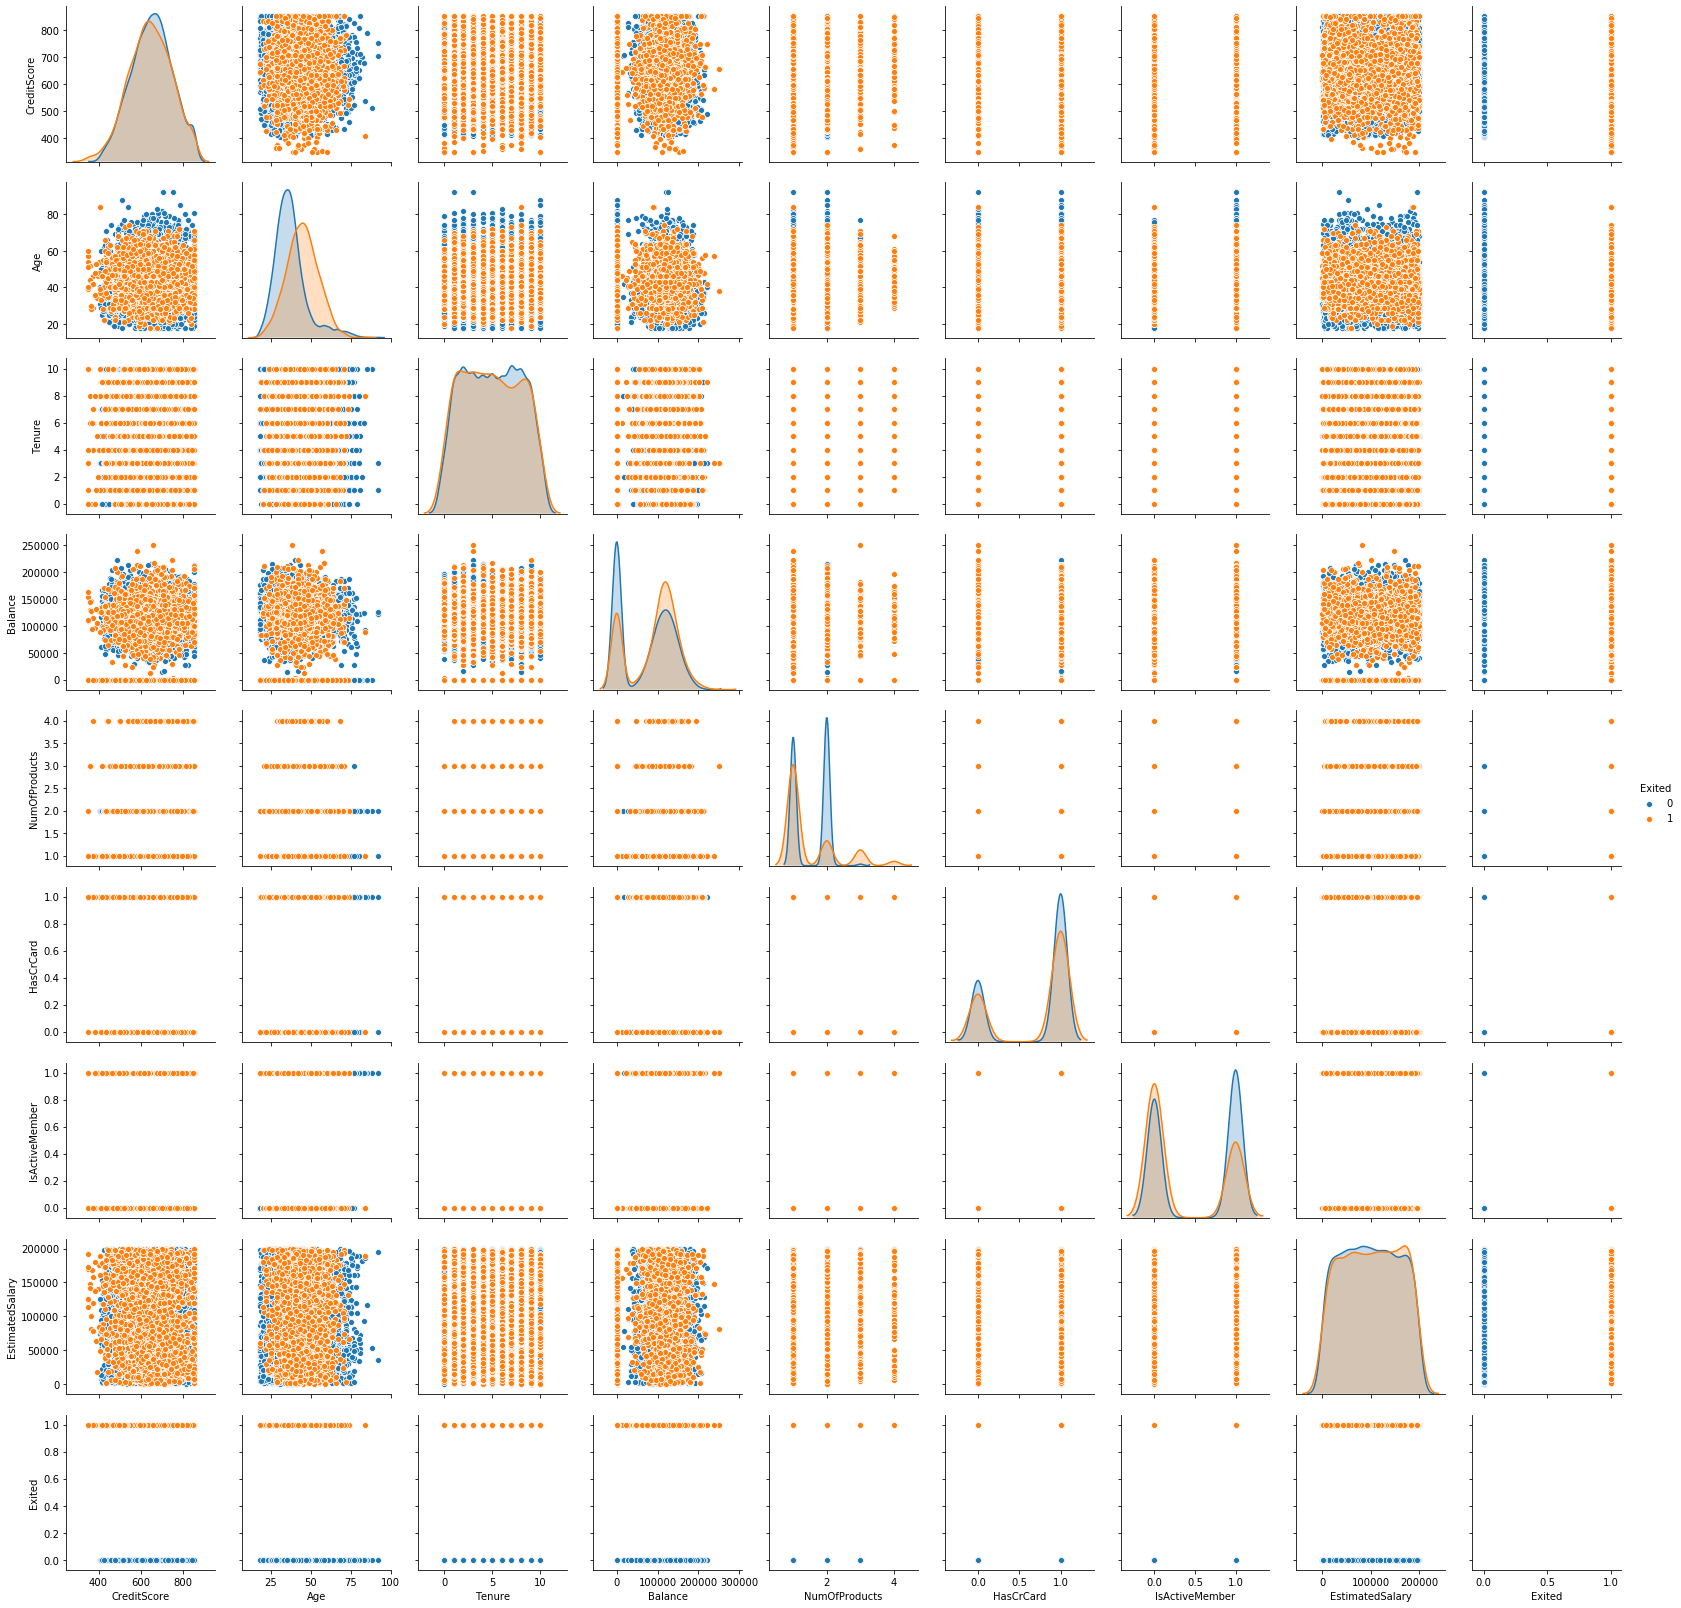

In [8]:
sns.pairplot(raw_df[raw_df.columns[2:]], hue='Exited')
#it seems that data is not easily saparable! 

# DATA PREPROCESSING

In [5]:
# Geography and Gender are categorical features and we need to convert them using dummy_variables in scikit-learn
X_dummy = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [6]:
X_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
#since the scale of variables are not homogeneous, it is highly recommended to apply feature scaling
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(X_dummy)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x_sc = sc.transform(X_dummy)

In [11]:
X_sc = pd.DataFrame(data=x_sc, columns=X_dummy.columns, index=X_dummy.index)

In [12]:
X_sc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
2,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
3,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
4,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
5,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [13]:
#Now I split our dataset to train and test datasets
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_sc, y, test_size=0.3, random_state=42)

# MACHINE LEARNING - LOGISTIC REGRESSION

In [19]:
#Let's see how logistic regression works using default parameters
from sklearn.linear_model import LogisticRegression

In [20]:
log_md = LogisticRegression(solver='lbfgs')

In [21]:
log_md.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
prediction = log_md.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[2318   98]
 [ 468  116]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



# NEURAL NETWORK WITH KERAS

In [15]:
# Now, as can be seen, logistic regression is not very accurate in its default format.
#let's change gear to neural networks
import keras

Using TensorFlow backend.
C:\Users\AhmadReza\.conda\envs\deep_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AhmadReza\.conda\envs\deep_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AhmadReza\.conda\envs\deep_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AhmadReza\.conda\envs\deep

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [17]:
ann_classifier = Sequential()

In [18]:
#adding input layer and the first hidden layer
ann_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# in case of overfitting, you can apply dropout to the hidden layers
#ann_classifier.add(Dropout(0.1))

In [19]:
#adding 2nd hidden layer, Although it is not useful for this dataset
ann_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [20]:
#adding output layer
ann_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
ann_classifier.fit(X_train.values, y_train.values, batch_size=10, epochs=100)

Epoch 1/100
7000/7000 [==============================] - 3s 385us/step - loss: 0.4968 - acc: 0.7924
Epoch 2/100
7000/7000 [==============================] - 1s 93us/step - loss: 0.4284 - acc: 0.8091
Epoch 3/100
7000/7000 [==============================] - 1s 94us/step - loss: 0.4217 - acc: 0.8206
Epoch 4/100
7000/7000 [==============================] - 1s 91us/step - loss: 0.4170 - acc: 0.8250
Epoch 5/100
7000/7000 [==============================] - 1s 91us/step - loss: 0.4136 - acc: 0.8244
Epoch 6/100
7000/7000 [==============================] - 1s 92us/step - loss: 0.4119 - acc: 0.8277
Epoch 7/100
7000/7000 [==============================] - 1s 93us/step - loss: 0.4102 - acc: 0.8283
Epoch 8/100
7000/7000 [==============================] - 1s 93us/step - loss: 0.4081 - acc: 0.8303
Epoch 9/100
7000/7000 [==============================] - 1s 90us/step - loss: 0.4079 - acc: 0.8306
Epoch 10/100
7000/7000 [==============================] - 1s 90us/step - loss: 0.4074 - acc: 0.8300
Epoch 11

7000/7000 [==============================] - 1s 90us/step - loss: 0.3420 - acc: 0.8589
Epoch 83/100
7000/7000 [==============================] - 1s 88us/step - loss: 0.3421 - acc: 0.8596
Epoch 84/100
7000/7000 [==============================] - 1s 89us/step - loss: 0.3414 - acc: 0.8583
Epoch 85/100
7000/7000 [==============================] - 1s 90us/step - loss: 0.3408 - acc: 0.8590
Epoch 86/100
7000/7000 [==============================] - 1s 90us/step - loss: 0.3417 - acc: 0.8577
Epoch 87/100
7000/7000 [==============================] - 1s 89us/step - loss: 0.3415 - acc: 0.8576
Epoch 88/100
7000/7000 [==============================] - 1s 90us/step - loss: 0.3418 - acc: 0.8577
Epoch 89/100
7000/7000 [==============================] - 1s 99us/step - loss: 0.3406 - acc: 0.8589
Epoch 90/100
7000/7000 [==============================] - 1s 110us/step - loss: 0.3412 - acc: 0.8567
Epoch 91/100
7000/7000 [==============================] - 1s 102us/step - loss: 0.3416 - acc: 0.8584
Epoch 92/10

In [39]:
ann_predictions = ann_classifier.predict_classes(X_test.values).ravel()

In [40]:
print(prediction[:30])
print(ann_predictions[:30])
print(y_test.values[:30])

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [41]:
print(confusion_matrix(y_test, ann_predictions))
print('\n')
print(classification_report(y_test, ann_predictions))

[[2344   72]
 [ 391  193]]


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.73      0.33      0.45       584

    accuracy                           0.85      3000
   macro avg       0.79      0.65      0.68      3000
weighted avg       0.83      0.85      0.82      3000



In [45]:
# now we want to test a customer. Of course if we want to generalize this testing, it requires to build a pipeline. For now 
#let's keep it simple

find out whether this customer stays with the bank or not?
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: 60000
* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: 50000

In [42]:
X_test.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [47]:
customer = np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]])

In [48]:
customer_sc = sc.transform(customer)

In [49]:
customer_sc

array([[-0.52281016,  0.10281024, -0.69598177, -0.26422114,  0.80773656,
         0.64609167,  0.97024255, -0.87101922, -0.57873591, -0.57380915,
         0.91241915]])

In [51]:
ann_classifier.predict_classes(customer_sc)

array([[0]])

In [52]:
#hopefully he stays with us!

# K-FOLD CROSS VALIDATION SCORE

In [ ]:
# now let's try k-fold cross validation technique to make sure that bias-variance is optimized

This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds. we can use scikit learn for this purpose
Page 181, An Introduction to Statistical Learning, 2013.
### K = 10
* after shuffling, you will resample your data into 10 equally sized sets. Each of them reperesent a test set while the the rest of data will be used for training
* A special case of K = 2 is the ordinary train-test-split procedure

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
from keras.wrappers.scikit_learn import KerasClassifier

In [125]:
def classifier_keras(optimizer='adam'):
    ann_classifier = Sequential()
    ann_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    ann_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    ann_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    ann_classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann_classifier

In [116]:
classifier_keras()

In [117]:
kfold_classifier = KerasClassifier(classifier_keras,  batch_size=10, epochs=100 )

In [113]:
accuracy_arr = cross_val_score(kfold_classifier, X_sc.values, y=y.values, cv=10, n_jobs=-1, verbose=20,)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.1min remaining: 16.5min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  4.1min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  4.4min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  4.4min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  4.4min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  4.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.9min finished


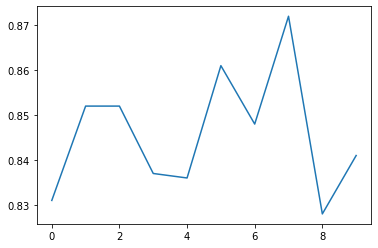

In [114]:
plt.plot(accuracy_arr)

the small variation of accuracy array shows that the model has been properly trained with no overfitting. In case of high variance, drop out approach has proven to be a great choice.

# TUNING HYPER-PARAMETERS

In [119]:
# I use grid search module from sklearn 

In [120]:
from sklearn.model_selection import GridSearchCV

In [129]:
estimator = KerasClassifier(classifier_keras)

In [134]:
grid_param = {'optimizer': ['adam', 'rmsprop'],
             'batch_size': [16, 32, 64],
             'epochs': [50, 100, 150]}

In [135]:
grid = GridSearchCV(estimator, param_grid=grid_param, scoring='accuracy', cv=10, verbose=2)

In [136]:
grid.fit(X_sc.values, y.values)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] batch_size=16, epochs=50, optimizer=adam ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
9000/9000 [==============================] - 1s 79us/step - loss: 0.5028 - accuracy: 0.7958
Epoch 2/50
9000/9000 [==============================] - 1s 66us/step - loss: 0.4313 - accuracy: 0.7963
Epoch 3/50
9000/9000 [==============================] - 1s 66us/step - loss: 0.4255 - accuracy: 0.7963
Epoch 4/50
9000/9000 [==============================] - 1s 67us/step - loss: 0.4207 - accuracy: 0.8074
Epoch 5/50
9000/9000 [==============================] - 1s 66us/step - loss: 0.4180 - accuracy: 0.8264
Epoch 6/50
9000/9000 [==============================] - 1s 66us/step - loss: 0.4155 - accuracy: 0.8267
Epoch 7/50
9000/9000 [==============================] - 1s 67us/step - loss: 0.4139 - accuracy: 0.8307
Epoch 8/50
9000/9000 [==============================] - 1s 67us/step - loss: 0.4124 - accuracy: 0.8317
Epoch 9/50
9000/9000 [==============================] - 1s 68us/step - loss: 0.4107 - accuracy: 0.8321
Epoch 10/50
9000/9000 [==============================] - 1s 69us/step - l

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.8s remaining:    0.0s


Epoch 1/50
9000/9000 [==============================] - 1s 74us/step - loss: 0.4931 - accuracy: 0.7972
Epoch 2/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4279 - accuracy: 0.7972
Epoch 3/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4215 - accuracy: 0.7972
Epoch 4/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.4168 - accuracy: 0.8217
Epoch 5/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.4138 - accuracy: 0.8279
Epoch 6/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4119 - accuracy: 0.8319
Epoch 7/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4106 - accuracy: 0.8317
Epoch 8/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4091 - accuracy: 0.8320
Epoch 9/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.4086 - accuracy: 0.8332
Epoch 10/50
9000/9000 [==============================] - 1s 64us/step - l

9000/9000 [==============================] - 1s 64us/step - loss: 0.4287 - accuracy: 0.7959
Epoch 4/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4268 - accuracy: 0.7959
Epoch 5/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4228 - accuracy: 0.8024
Epoch 6/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4199 - accuracy: 0.8183
Epoch 7/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4172 - accuracy: 0.8231
Epoch 8/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4155 - accuracy: 0.8249
Epoch 9/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4137 - accuracy: 0.8298
Epoch 10/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4123 - accuracy: 0.8297
Epoch 11/50
9000/9000 [==============================] - 1s 66us/step - loss: 0.4108 - accuracy: 0.8299
Epoch 12/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.40

9000/9000 [==============================] - 1s 62us/step - loss: 0.4152 - accuracy: 0.8297
Epoch 7/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.4140 - accuracy: 0.8287
Epoch 8/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4127 - accuracy: 0.8306
Epoch 9/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.4115 - accuracy: 0.8304
Epoch 10/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4107 - accuracy: 0.8313
Epoch 11/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4097 - accuracy: 0.8320
Epoch 12/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.4090 - accuracy: 0.8342
Epoch 13/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.4078 - accuracy: 0.8331
Epoch 14/50
9000/9000 [==============================] - 1s 69us/step - loss: 0.4077 - accuracy: 0.8340
Epoch 15/50
9000/9000 [==============================] - 1s 72us/step - loss: 0

9000/9000 [==============================] - 1s 58us/step - loss: 0.3704 - accuracy: 0.8487
Epoch 10/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.3659 - accuracy: 0.8504
Epoch 11/50
9000/9000 [==============================] - 1s 58us/step - loss: 0.3625 - accuracy: 0.8514
Epoch 12/50
9000/9000 [==============================] - 1s 59us/step - loss: 0.3606 - accuracy: 0.8527
Epoch 13/50
9000/9000 [==============================] - 1s 60us/step - loss: 0.3582 - accuracy: 0.8548
Epoch 14/50
9000/9000 [==============================] - 1s 59us/step - loss: 0.3562 - accuracy: 0.8568
Epoch 15/50
9000/9000 [==============================] - 1s 58us/step - loss: 0.3542 - accuracy: 0.8556
Epoch 16/50
9000/9000 [==============================] - 1s 57us/step - loss: 0.3533 - accuracy: 0.8536
Epoch 17/50
9000/9000 [==============================] - 1s 58us/step - loss: 0.3517 - accuracy: 0.8556
Epoch 18/50
9000/9000 [==============================] - 1s 59us/step - loss

9000/9000 [==============================] - 1s 63us/step - loss: 0.3995 - accuracy: 0.8362
Epoch 12/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.3985 - accuracy: 0.8353
Epoch 13/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.3974 - accuracy: 0.8366
Epoch 14/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.3975 - accuracy: 0.8368
Epoch 15/50
9000/9000 [==============================] - 1s 61us/step - loss: 0.3968 - accuracy: 0.8364
Epoch 16/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.3960 - accuracy: 0.8378
Epoch 17/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.3959 - accuracy: 0.8373
Epoch 18/50
9000/9000 [==============================] - 1s 64us/step - loss: 0.3953 - accuracy: 0.8360
Epoch 19/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3950 - accuracy: 0.8372
Epoch 20/50
9000/9000 [==============================] - 1s 62us/step - loss

9000/9000 [==============================] - 1s 62us/step - loss: 0.4067 - accuracy: 0.8338
Epoch 15/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.4064 - accuracy: 0.8360
Epoch 16/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4063 - accuracy: 0.8348
Epoch 17/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4054 - accuracy: 0.8347
Epoch 18/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4046 - accuracy: 0.8347
Epoch 19/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.4052 - accuracy: 0.8354
Epoch 20/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4047 - accuracy: 0.8350
Epoch 21/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.4043 - accuracy: 0.8360
Epoch 22/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.4042 - accuracy: 0.8344
Epoch 23/50
9000/9000 [==============================] - 1s 63us/step - loss

9000/9000 [==============================] - 1s 61us/step - loss: 0.3978 - accuracy: 0.8374
Epoch 18/50
9000/9000 [==============================] - 1s 63us/step - loss: 0.3972 - accuracy: 0.8368
Epoch 19/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3950 - accuracy: 0.8382
Epoch 20/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3918 - accuracy: 0.8401
Epoch 21/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3887 - accuracy: 0.8410
Epoch 22/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3852 - accuracy: 0.8417
Epoch 23/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3812 - accuracy: 0.8430
Epoch 24/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3765 - accuracy: 0.8457
Epoch 25/50
9000/9000 [==============================] - 1s 62us/step - loss: 0.3711 - accuracy: 0.8482
Epoch 26/50
9000/9000 [==============================] - 1s 63us/step - loss

9000/9000 [==============================] - 1s 66us/step - loss: 0.4001 - accuracy: 0.8364
Epoch 21/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3990 - accuracy: 0.8361
Epoch 22/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3984 - accuracy: 0.8368
Epoch 23/100
9000/9000 [==============================] - 1s 67us/step - loss: 0.3976 - accuracy: 0.8366
Epoch 24/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3966 - accuracy: 0.8369
Epoch 25/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3960 - accuracy: 0.8367
Epoch 26/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3962 - accuracy: 0.8371
Epoch 27/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3952 - accuracy: 0.8363
Epoch 28/100
9000/9000 [==============================] - 1s 67us/step - loss: 0.3947 - accuracy: 0.8369
Epoch 29/100
9000/9000 [==============================] - 1s 66us/st

9000/9000 [==============================] - 1s 65us/step - loss: 0.3974 - accuracy: 0.8386
Epoch 75/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3974 - accuracy: 0.8374
Epoch 76/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3977 - accuracy: 0.8370
Epoch 77/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3973 - accuracy: 0.8378
Epoch 78/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3974 - accuracy: 0.8368
Epoch 79/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3974 - accuracy: 0.8367
Epoch 80/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3972 - accuracy: 0.8380
Epoch 81/100
9000/9000 [==============================] - 1s 64us/step - loss: 0.3976 - accuracy: 0.8370
Epoch 82/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3972 - accuracy: 0.8378
Epoch 83/100
9000/9000 [==============================] - 1s 65us/st

9000/9000 [==============================] - 1s 66us/step - loss: 0.3941 - accuracy: 0.8367
Epoch 27/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3942 - accuracy: 0.8386
Epoch 28/100
9000/9000 [==============================] - 1s 67us/step - loss: 0.3942 - accuracy: 0.8367
Epoch 29/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3942 - accuracy: 0.8376
Epoch 30/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3935 - accuracy: 0.8376
Epoch 31/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3936 - accuracy: 0.8364
Epoch 32/100
9000/9000 [==============================] - 1s 67us/step - loss: 0.3936 - accuracy: 0.8390
Epoch 33/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3939 - accuracy: 0.8387
Epoch 34/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3936 - accuracy: 0.8386
Epoch 35/100
9000/9000 [==============================] - 1s 65us/st

9000/9000 [==============================] - 1s 64us/step - loss: 0.3987 - accuracy: 0.8381
Epoch 81/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3990 - accuracy: 0.8369
Epoch 82/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3981 - accuracy: 0.8391
Epoch 83/100
9000/9000 [==============================] - 1s 67us/step - loss: 0.3991 - accuracy: 0.8374
Epoch 84/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.3987 - accuracy: 0.8374
Epoch 85/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3989 - accuracy: 0.8382
Epoch 86/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3983 - accuracy: 0.8378
Epoch 87/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3988 - accuracy: 0.8377
Epoch 88/100
9000/9000 [==============================] - 1s 65us/step - loss: 0.3984 - accuracy: 0.8374
Epoch 89/100
9000/9000 [==============================] - 1s 65us/st

9000/9000 [==============================] - 1s 68us/step - loss: 0.4029 - accuracy: 0.8342
Epoch 33/100
9000/9000 [==============================] - 1s 70us/step - loss: 0.4026 - accuracy: 0.8340
Epoch 34/100
9000/9000 [==============================] - 1s 69us/step - loss: 0.4028 - accuracy: 0.8340
Epoch 35/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.4022 - accuracy: 0.8329
Epoch 36/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.4025 - accuracy: 0.8342
Epoch 37/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.4022 - accuracy: 0.8354
Epoch 38/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.4026 - accuracy: 0.8350
Epoch 39/100
9000/9000 [==============================] - 1s 70us/step - loss: 0.4022 - accuracy: 0.8337
Epoch 40/100
9000/9000 [==============================] - 1s 69us/step - loss: 0.4024 - accuracy: 0.8319
Epoch 41/100
9000/9000 [==============================] - 1s 68us/st

9000/9000 [==============================] - 1s 70us/step - loss: 0.3956 - accuracy: 0.8367
Epoch 87/100
9000/9000 [==============================] - 1s 69us/step - loss: 0.3955 - accuracy: 0.8378
Epoch 88/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.3955 - accuracy: 0.8373
Epoch 89/100
9000/9000 [==============================] - 1s 70us/step - loss: 0.3954 - accuracy: 0.8371
Epoch 90/100
9000/9000 [==============================] - 1s 69us/step - loss: 0.3953 - accuracy: 0.8370
Epoch 91/100
9000/9000 [==============================] - 1s 71us/step - loss: 0.3954 - accuracy: 0.8380
Epoch 92/100
9000/9000 [==============================] - 1s 70us/step - loss: 0.3958 - accuracy: 0.8379
Epoch 93/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.3954 - accuracy: 0.8379
Epoch 94/100
9000/9000 [==============================] - 1s 66us/step - loss: 0.3957 - accuracy: 0.8354
Epoch 95/100
9000/9000 [==============================] - 1s 66us/st

9000/9000 [==============================] - 1s 63us/step - loss: 0.3412 - accuracy: 0.8602
Epoch 39/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3413 - accuracy: 0.8608
Epoch 40/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3410 - accuracy: 0.8609
Epoch 41/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3409 - accuracy: 0.8618
Epoch 42/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3408 - accuracy: 0.8620
Epoch 43/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3409 - accuracy: 0.8613
Epoch 44/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3407 - accuracy: 0.8589
Epoch 45/100
9000/9000 [==============================] - 1s 64us/step - loss: 0.3411 - accuracy: 0.8606
Epoch 46/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3405 - accuracy: 0.8607
Epoch 47/100
9000/9000 [==============================] - 1s 62us/st

9000/9000 [==============================] - 1s 60us/step - loss: 0.3908 - accuracy: 0.8398
Epoch 93/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3907 - accuracy: 0.8404
Epoch 94/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3905 - accuracy: 0.8406
Epoch 95/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3904 - accuracy: 0.8401
Epoch 96/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3907 - accuracy: 0.8379
Epoch 97/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3909 - accuracy: 0.8404
Epoch 98/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3904 - accuracy: 0.8406
Epoch 99/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3909 - accuracy: 0.8401
Epoch 100/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3905 - accuracy: 0.8378
[CV] ..... batch_size=16, epochs=100, optimizer=rmsprop, total=  56

9000/9000 [==============================] - 1s 62us/step - loss: 0.3926 - accuracy: 0.8407
Epoch 45/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3927 - accuracy: 0.8417
Epoch 46/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3927 - accuracy: 0.8402
Epoch 47/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3926 - accuracy: 0.8419
Epoch 48/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3925 - accuracy: 0.8414
Epoch 49/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3923 - accuracy: 0.8399
Epoch 50/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3925 - accuracy: 0.8392
Epoch 51/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3930 - accuracy: 0.8409
Epoch 52/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3926 - accuracy: 0.8399
Epoch 53/100
9000/9000 [==============================] - 1s 63us/st

9000/9000 [==============================] - 1s 61us/step - loss: 0.3938 - accuracy: 0.8359
Epoch 99/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.3936 - accuracy: 0.8372
Epoch 100/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.3941 - accuracy: 0.8384
[CV] ..... batch_size=16, epochs=100, optimizer=rmsprop, total=  55.7s
[CV] batch_size=16, epochs=100, optimizer=rmsprop ....................
Epoch 1/100
9000/9000 [==============================] - 1s 71us/step - loss: 0.5106 - accuracy: 0.7962
Epoch 2/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4331 - accuracy: 0.7962
Epoch 3/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4266 - accuracy: 0.7962
Epoch 4/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4209 - accuracy: 0.8007
Epoch 5/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4174 - accuracy: 0.8236
Epoch 6/100
9000/9000 [============

9000/9000 [==============================] - 1s 62us/step - loss: 0.4012 - accuracy: 0.8358
Epoch 51/100
9000/9000 [==============================] - 1s 64us/step - loss: 0.4006 - accuracy: 0.8348
Epoch 52/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4006 - accuracy: 0.8350
Epoch 53/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4009 - accuracy: 0.8356
Epoch 54/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.4005 - accuracy: 0.8343
Epoch 55/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4005 - accuracy: 0.8352
Epoch 56/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.4009 - accuracy: 0.8360
Epoch 57/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4008 - accuracy: 0.8351
Epoch 58/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4005 - accuracy: 0.8369
Epoch 59/100
9000/9000 [==============================] - 1s 63us/st

9000/9000 [==============================] - 1s 61us/step - loss: 0.4309 - accuracy: 0.7971
Epoch 3/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4242 - accuracy: 0.7971
Epoch 4/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4197 - accuracy: 0.7971
Epoch 5/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4161 - accuracy: 0.8190
Epoch 6/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4130 - accuracy: 0.8292
Epoch 7/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.4114 - accuracy: 0.8311
Epoch 8/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4095 - accuracy: 0.8320
Epoch 9/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.4082 - accuracy: 0.8334
Epoch 10/100
9000/9000 [==============================] - 1s 60us/step - loss: 0.4065 - accuracy: 0.8347
Epoch 11/100
9000/9000 [==============================] - 1s 63us/step - lo

9000/9000 [==============================] - 1s 62us/step - loss: 0.3388 - accuracy: 0.8583
Epoch 57/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3383 - accuracy: 0.8621
Epoch 58/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3385 - accuracy: 0.8606
Epoch 59/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.3393 - accuracy: 0.8604
Epoch 60/100
9000/9000 [==============================] - 1s 63us/step - loss: 0.3389 - accuracy: 0.8608
Epoch 61/100
9000/9000 [==============================] - 1s 61us/step - loss: 0.3384 - accuracy: 0.8608
Epoch 62/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3385 - accuracy: 0.8608
Epoch 63/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3378 - accuracy: 0.8581
Epoch 64/100
9000/9000 [==============================] - 1s 62us/step - loss: 0.3380 - accuracy: 0.8610
Epoch 65/100
9000/9000 [==============================] - 1s 62us/st

9000/9000 [==============================] - 1s 65us/step - loss: 0.3825 - accuracy: 0.8437
Epoch 111/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3825 - accuracy: 0.8420
Epoch 112/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3825 - accuracy: 0.8443
Epoch 113/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3824 - accuracy: 0.8436
Epoch 114/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3816 - accuracy: 0.8442
Epoch 115/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3822 - accuracy: 0.8413
Epoch 116/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3825 - accuracy: 0.8428
Epoch 117/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3820 - accuracy: 0.8437
Epoch 118/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3818 - accuracy: 0.8417
Epoch 119/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 68us/step - loss: 0.3886 - accuracy: 0.8409
Epoch 115/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3874 - accuracy: 0.8403
Epoch 116/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3874 - accuracy: 0.8413
Epoch 117/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3857 - accuracy: 0.8420
Epoch 118/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3852 - accuracy: 0.8422
Epoch 119/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3826 - accuracy: 0.8431
Epoch 120/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3780 - accuracy: 0.8430
Epoch 121/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3725 - accuracy: 0.8463
Epoch 122/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3680 - accuracy: 0.8483
Epoch 123/150
9000/9000 [==============================] - 1

Epoch 118/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3363 - accuracy: 0.8614
Epoch 119/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3369 - accuracy: 0.8620
Epoch 120/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3360 - accuracy: 0.8629
Epoch 121/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3365 - accuracy: 0.8606
Epoch 122/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3368 - accuracy: 0.8622
Epoch 123/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3362 - accuracy: 0.8611
Epoch 124/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3364 - accuracy: 0.8622
Epoch 125/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3359 - accuracy: 0.8609
Epoch 126/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3362 - accuracy: 0.8628
Epoch 127/150
9000/9000 [=====================

9000/9000 [==============================] - 1s 64us/step - loss: 0.3910 - accuracy: 0.8386
Epoch 122/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3910 - accuracy: 0.8389
Epoch 123/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3908 - accuracy: 0.8401
Epoch 124/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3910 - accuracy: 0.8386
Epoch 125/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3906 - accuracy: 0.8388
Epoch 126/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3909 - accuracy: 0.8403
Epoch 127/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3901 - accuracy: 0.8389
Epoch 128/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3909 - accuracy: 0.8389
Epoch 129/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3908 - accuracy: 0.8380
Epoch 130/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 69us/step - loss: 0.3979 - accuracy: 0.8372
Epoch 125/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3979 - accuracy: 0.8364
Epoch 126/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3980 - accuracy: 0.8376
Epoch 127/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3981 - accuracy: 0.8354
Epoch 128/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3981 - accuracy: 0.8369
Epoch 129/150
9000/9000 [==============================] - 1s 68us/step - loss: 0.3981 - accuracy: 0.8356
Epoch 130/150
9000/9000 [==============================] - 1s 70us/step - loss: 0.3975 - accuracy: 0.8354
Epoch 131/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3973 - accuracy: 0.8372
Epoch 132/150
9000/9000 [==============================] - 1s 69us/step - loss: 0.3978 - accuracy: 0.8364
Epoch 133/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 66us/step - loss: 0.3382 - accuracy: 0.8612
Epoch 128/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3387 - accuracy: 0.8586
Epoch 129/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3384 - accuracy: 0.8608
Epoch 130/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3378 - accuracy: 0.8592
Epoch 131/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3387 - accuracy: 0.8579
Epoch 132/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3394 - accuracy: 0.8599
Epoch 133/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3382 - accuracy: 0.8569
Epoch 134/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3376 - accuracy: 0.8583
Epoch 135/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3383 - accuracy: 0.8600
Epoch 136/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 63us/step - loss: 0.3996 - accuracy: 0.8347
Epoch 131/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3996 - accuracy: 0.8368
Epoch 132/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3997 - accuracy: 0.8362
Epoch 133/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3997 - accuracy: 0.8376
Epoch 134/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3998 - accuracy: 0.8352
Epoch 135/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.4001 - accuracy: 0.8352
Epoch 136/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3998 - accuracy: 0.8353
Epoch 137/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.4000 - accuracy: 0.8359
Epoch 138/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3998 - accuracy: 0.8349
Epoch 139/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 64us/step - loss: 0.3372 - accuracy: 0.8603
Epoch 134/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3379 - accuracy: 0.8584
Epoch 135/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3375 - accuracy: 0.8604
Epoch 136/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3377 - accuracy: 0.8584
Epoch 137/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3367 - accuracy: 0.8612
Epoch 138/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3377 - accuracy: 0.8611
Epoch 139/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3372 - accuracy: 0.8602
Epoch 140/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3377 - accuracy: 0.8598
Epoch 141/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3382 - accuracy: 0.8587
Epoch 142/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 67us/step - loss: 0.3950 - accuracy: 0.8384
Epoch 137/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3952 - accuracy: 0.8382
Epoch 138/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3952 - accuracy: 0.8383
Epoch 139/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3951 - accuracy: 0.8379
Epoch 140/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3951 - accuracy: 0.8377
Epoch 141/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3949 - accuracy: 0.8380
Epoch 142/150
9000/9000 [==============================] - 1s 67us/step - loss: 0.3952 - accuracy: 0.8377
Epoch 143/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3952 - accuracy: 0.8381
Epoch 144/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3946 - accuracy: 0.8372
Epoch 145/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 66us/step - loss: 0.3388 - accuracy: 0.8607
Epoch 140/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3394 - accuracy: 0.8594
Epoch 141/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3384 - accuracy: 0.8604
Epoch 142/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3390 - accuracy: 0.8594
Epoch 143/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3391 - accuracy: 0.8600
Epoch 144/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3390 - accuracy: 0.8619
Epoch 145/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3391 - accuracy: 0.8608
Epoch 146/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3389 - accuracy: 0.8593
Epoch 147/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3389 - accuracy: 0.8584
Epoch 148/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 1s 63us/step - loss: 0.3929 - accuracy: 0.8379
Epoch 143/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3929 - accuracy: 0.8411
Epoch 144/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3930 - accuracy: 0.8394
Epoch 145/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3929 - accuracy: 0.8396
Epoch 146/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3929 - accuracy: 0.8387
Epoch 147/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3927 - accuracy: 0.8398
Epoch 148/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3930 - accuracy: 0.8391
Epoch 149/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3929 - accuracy: 0.8391
Epoch 150/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3927 - accuracy: 0.8384
[CV] ..... batch_size=16, epochs=150, optimizer=rmsprop, tot

9000/9000 [==============================] - 1s 62us/step - loss: 0.3974 - accuracy: 0.8366
Epoch 146/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3972 - accuracy: 0.8370
Epoch 147/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3976 - accuracy: 0.8363
Epoch 148/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3971 - accuracy: 0.8364
Epoch 149/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3973 - accuracy: 0.8379
Epoch 150/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.3976 - accuracy: 0.8369
[CV] ..... batch_size=16, epochs=150, optimizer=rmsprop, total= 1.4min
[CV] batch_size=16, epochs=150, optimizer=rmsprop ....................
Epoch 1/150
9000/9000 [==============================] - 1s 72us/step - loss: 0.5515 - accuracy: 0.7973
Epoch 2/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4346 - accuracy: 0.7977
Epoch 3/150
9000/9000 [=====

9000/9000 [==============================] - 1s 60us/step - loss: 0.3896 - accuracy: 0.8426
Epoch 149/150
9000/9000 [==============================] - 1s 60us/step - loss: 0.3896 - accuracy: 0.8416
Epoch 150/150
9000/9000 [==============================] - 1s 60us/step - loss: 0.3897 - accuracy: 0.8416
[CV] ..... batch_size=16, epochs=150, optimizer=rmsprop, total= 1.4min
[CV] batch_size=16, epochs=150, optimizer=rmsprop ....................
Epoch 1/150
9000/9000 [==============================] - 1s 71us/step - loss: 0.5327 - accuracy: 0.7966
Epoch 2/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4347 - accuracy: 0.7974
Epoch 3/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4278 - accuracy: 0.7974
Epoch 4/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4247 - accuracy: 0.7974
Epoch 5/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4210 - accuracy: 0.7997
Epoch 6/150
9000/9000 [===========

Epoch 1/150
9000/9000 [==============================] - 1s 74us/step - loss: 0.5238 - accuracy: 0.7956
Epoch 2/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.4304 - accuracy: 0.7959
Epoch 3/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4222 - accuracy: 0.7959
Epoch 4/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4162 - accuracy: 0.8260
Epoch 5/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4113 - accuracy: 0.8306
Epoch 6/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.4079 - accuracy: 0.8317
Epoch 7/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4055 - accuracy: 0.8349
Epoch 8/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4034 - accuracy: 0.8330
Epoch 9/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4014 - accuracy: 0.8366
Epoch 10/150
9000/9000 [==============================] - 1s 61u

9000/9000 [==============================] - 1s 63us/step - loss: 0.3920 - accuracy: 0.8393
Epoch 80/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3920 - accuracy: 0.8409
Epoch 81/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3919 - accuracy: 0.8412
Epoch 82/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3915 - accuracy: 0.8406
Epoch 83/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3925 - accuracy: 0.8404
Epoch 84/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3920 - accuracy: 0.8414
Epoch 85/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3916 - accuracy: 0.8404
Epoch 86/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3915 - accuracy: 0.8396
Epoch 87/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3915 - accuracy: 0.8407
Epoch 88/150
9000/9000 [==============================] - 1s 63us/st

9000/9000 [==============================] - 1s 66us/step - loss: 0.3995 - accuracy: 0.8369
Epoch 84/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3992 - accuracy: 0.8367
Epoch 85/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3993 - accuracy: 0.8360
Epoch 86/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3995 - accuracy: 0.8371
Epoch 87/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3997 - accuracy: 0.8362
Epoch 88/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3995 - accuracy: 0.8369
Epoch 89/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3994 - accuracy: 0.8378
Epoch 90/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3994 - accuracy: 0.8368
Epoch 91/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3992 - accuracy: 0.8363
Epoch 92/150
9000/9000 [==============================] - 1s 62us/st

9000/9000 [==============================] - 1s 63us/step - loss: 0.4014 - accuracy: 0.8346
Epoch 88/150
9000/9000 [==============================] - 1s 61us/step - loss: 0.4016 - accuracy: 0.8357
Epoch 89/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.4015 - accuracy: 0.8354
Epoch 90/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.4008 - accuracy: 0.8344
Epoch 91/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.4016 - accuracy: 0.8341
Epoch 92/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.4013 - accuracy: 0.8342
Epoch 93/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4010 - accuracy: 0.8348
Epoch 94/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.4011 - accuracy: 0.8354
Epoch 95/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.4013 - accuracy: 0.8357
Epoch 96/150
9000/9000 [==============================] - 1s 64us/st

9000/9000 [==============================] - 1s 65us/step - loss: 0.3955 - accuracy: 0.8387
Epoch 92/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3955 - accuracy: 0.8379
Epoch 93/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3952 - accuracy: 0.8399
Epoch 94/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3955 - accuracy: 0.8374
Epoch 95/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3953 - accuracy: 0.8382
Epoch 96/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3953 - accuracy: 0.8383
Epoch 97/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3956 - accuracy: 0.8380
Epoch 98/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3956 - accuracy: 0.8389
Epoch 99/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3953 - accuracy: 0.8380
Epoch 100/150
9000/9000 [==============================] - 1s 64us/s

9000/9000 [==============================] - 1s 63us/step - loss: 0.3930 - accuracy: 0.8371
Epoch 96/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3932 - accuracy: 0.8373
Epoch 97/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3930 - accuracy: 0.8373
Epoch 98/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3929 - accuracy: 0.8382
Epoch 99/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3929 - accuracy: 0.8367
Epoch 100/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3927 - accuracy: 0.8382
Epoch 101/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3929 - accuracy: 0.8371
Epoch 102/150
9000/9000 [==============================] - 1s 63us/step - loss: 0.3929 - accuracy: 0.8366
Epoch 103/150
9000/9000 [==============================] - 1s 62us/step - loss: 0.3924 - accuracy: 0.8388
Epoch 104/150
9000/9000 [==============================] - 1s 63

9000/9000 [==============================] - 1s 65us/step - loss: 0.3398 - accuracy: 0.8604
Epoch 100/150
9000/9000 [==============================] - 1s 66us/step - loss: 0.3407 - accuracy: 0.8584
Epoch 101/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3398 - accuracy: 0.8614
Epoch 102/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3399 - accuracy: 0.8617
Epoch 103/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3396 - accuracy: 0.8589
Epoch 104/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3395 - accuracy: 0.8607
Epoch 105/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3393 - accuracy: 0.8617
Epoch 106/150
9000/9000 [==============================] - 1s 65us/step - loss: 0.3388 - accuracy: 0.8610
Epoch 107/150
9000/9000 [==============================] - 1s 64us/step - loss: 0.3390 - accuracy: 0.8637
Epoch 108/150
9000/9000 [==============================] - 1

9000/9000 [==============================] - 0s 46us/step - loss: 0.5563 - accuracy: 0.7972
Epoch 2/50
9000/9000 [==============================] - 0s 34us/step - loss: 0.4333 - accuracy: 0.7977
Epoch 3/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4272 - accuracy: 0.7977
Epoch 4/50
9000/9000 [==============================] - 0s 34us/step - loss: 0.4242 - accuracy: 0.7977
Epoch 5/50
9000/9000 [==============================] - 0s 34us/step - loss: 0.4213 - accuracy: 0.7977
Epoch 6/50
9000/9000 [==============================] - 0s 34us/step - loss: 0.4188 - accuracy: 0.7977
Epoch 7/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4168 - accuracy: 0.8163
Epoch 8/50
9000/9000 [==============================] - 0s 34us/step - loss: 0.4150 - accuracy: 0.8249
Epoch 9/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4137 - accuracy: 0.8278
Epoch 10/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4126

9000/9000 [==============================] - 0s 32us/step - loss: 0.4277 - accuracy: 0.7962
Epoch 5/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4243 - accuracy: 0.7962
Epoch 6/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4212 - accuracy: 0.7962
Epoch 7/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4190 - accuracy: 0.8119
Epoch 8/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.4176 - accuracy: 0.8228
Epoch 9/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4161 - accuracy: 0.8269
Epoch 10/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.4151 - accuracy: 0.8274
Epoch 11/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4137 - accuracy: 0.8284
Epoch 12/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4126 - accuracy: 0.8307
Epoch 13/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4

9000/9000 [==============================] - 0s 33us/step - loss: 0.4155 - accuracy: 0.8092
Epoch 8/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4137 - accuracy: 0.8243
Epoch 9/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4121 - accuracy: 0.8274
Epoch 10/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4111 - accuracy: 0.8314
Epoch 11/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4097 - accuracy: 0.8323
Epoch 12/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4088 - accuracy: 0.8326
Epoch 13/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4078 - accuracy: 0.8344
Epoch 14/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4070 - accuracy: 0.8336
Epoch 15/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4063 - accuracy: 0.8358
Epoch 16/50
9000/9000 [==============================] - 0s 32us/step - loss: 

9000/9000 [==============================] - 0s 32us/step - loss: 0.4100 - accuracy: 0.8330
Epoch 11/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4089 - accuracy: 0.8330
Epoch 12/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4078 - accuracy: 0.8353
Epoch 13/50
9000/9000 [==============================] - 0s 30us/step - loss: 0.4071 - accuracy: 0.8361
Epoch 14/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4059 - accuracy: 0.8356
Epoch 15/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4052 - accuracy: 0.8359
Epoch 16/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4046 - accuracy: 0.8364
Epoch 17/50
9000/9000 [==============================] - 0s 30us/step - loss: 0.4040 - accuracy: 0.8361
Epoch 18/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4033 - accuracy: 0.8360
Epoch 19/50
9000/9000 [==============================] - 0s 32us/step - loss

9000/9000 [==============================] - 0s 32us/step - loss: 0.4025 - accuracy: 0.8349
Epoch 14/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.4014 - accuracy: 0.8353
Epoch 15/50
9000/9000 [==============================] - 0s 30us/step - loss: 0.4004 - accuracy: 0.8360
Epoch 16/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.3996 - accuracy: 0.8349
Epoch 17/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.3988 - accuracy: 0.8372
Epoch 18/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.3984 - accuracy: 0.8377
Epoch 19/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.3978 - accuracy: 0.8372
Epoch 20/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.3975 - accuracy: 0.8376
Epoch 21/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.3971 - accuracy: 0.8369
Epoch 22/50
9000/9000 [==============================] - 0s 31us/step - loss

9000/9000 [==============================] - 0s 33us/step - loss: 0.4123 - accuracy: 0.8317
Epoch 17/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4116 - accuracy: 0.8317
Epoch 18/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4106 - accuracy: 0.8312
Epoch 19/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4101 - accuracy: 0.8327
Epoch 20/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4092 - accuracy: 0.8328
Epoch 21/50
9000/9000 [==============================] - 0s 33us/step - loss: 0.4086 - accuracy: 0.8338
Epoch 22/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4083 - accuracy: 0.8334
Epoch 23/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4076 - accuracy: 0.8343
Epoch 24/50
9000/9000 [==============================] - 0s 32us/step - loss: 0.4074 - accuracy: 0.8343
Epoch 25/50
9000/9000 [==============================] - 0s 32us/step - loss

9000/9000 [==============================] - 0s 34us/step - loss: 0.3395 - accuracy: 0.8616
Epoch 20/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3389 - accuracy: 0.8623
Epoch 21/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3376 - accuracy: 0.8619
Epoch 22/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3371 - accuracy: 0.8630
Epoch 23/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3368 - accuracy: 0.8624
Epoch 24/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3366 - accuracy: 0.8624
Epoch 25/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.3367 - accuracy: 0.8624
Epoch 26/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3362 - accuracy: 0.8626
Epoch 27/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.3362 - accuracy: 0.8623
Epoch 28/100
9000/9000 [==============================] - 0s 34us/st

9000/9000 [==============================] - 0s 33us/step - loss: 0.3967 - accuracy: 0.8389
Epoch 74/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3967 - accuracy: 0.8383
Epoch 75/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3965 - accuracy: 0.8372
Epoch 76/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3965 - accuracy: 0.8370
Epoch 77/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3965 - accuracy: 0.8380
Epoch 78/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3966 - accuracy: 0.8379
Epoch 79/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3965 - accuracy: 0.8378
Epoch 80/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3968 - accuracy: 0.8377
Epoch 81/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3964 - accuracy: 0.8387
Epoch 82/100
9000/9000 [==============================] - 0s 31us/st

9000/9000 [==============================] - 0s 34us/step - loss: 0.4038 - accuracy: 0.8348
Epoch 26/100
9000/9000 [==============================] - 0s 36us/step - loss: 0.4034 - accuracy: 0.8356
Epoch 27/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.4033 - accuracy: 0.8352
Epoch 28/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4026 - accuracy: 0.8359
Epoch 29/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4024 - accuracy: 0.8362
Epoch 30/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4024 - accuracy: 0.8360
Epoch 31/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4017 - accuracy: 0.8357
Epoch 32/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4016 - accuracy: 0.8359
Epoch 33/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4015 - accuracy: 0.8371
Epoch 34/100
9000/9000 [==============================] - 0s 34us/st

Epoch 79/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3986 - accuracy: 0.8344
Epoch 80/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3995 - accuracy: 0.8338
Epoch 81/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3988 - accuracy: 0.8358
Epoch 82/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3989 - accuracy: 0.8343
Epoch 83/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3988 - accuracy: 0.8357
Epoch 84/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3989 - accuracy: 0.8350
Epoch 85/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3988 - accuracy: 0.8360
Epoch 86/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3988 - accuracy: 0.8356
Epoch 87/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3987 - accuracy: 0.8354
Epoch 88/100
9000/9000 [==============================]

9000/9000 [==============================] - 0s 33us/step - loss: 0.4048 - accuracy: 0.8348
Epoch 32/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4045 - accuracy: 0.8346
Epoch 33/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4044 - accuracy: 0.8359
Epoch 34/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4037 - accuracy: 0.8349
Epoch 35/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4037 - accuracy: 0.8348
Epoch 36/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4036 - accuracy: 0.8356
Epoch 37/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4032 - accuracy: 0.8359
Epoch 38/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.4033 - accuracy: 0.8342
Epoch 39/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4031 - accuracy: 0.8348
Epoch 40/100
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 33us/step - loss: 0.3429 - accuracy: 0.8573
Epoch 86/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3427 - accuracy: 0.8583
Epoch 87/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3426 - accuracy: 0.8582
Epoch 88/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3427 - accuracy: 0.8599
Epoch 89/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3425 - accuracy: 0.8577
Epoch 90/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3429 - accuracy: 0.8600
Epoch 91/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3427 - accuracy: 0.8597
Epoch 92/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3420 - accuracy: 0.8583
Epoch 93/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3423 - accuracy: 0.8599
Epoch 94/100
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 33us/step - loss: 0.3952 - accuracy: 0.8377
Epoch 38/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3953 - accuracy: 0.8371
Epoch 39/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3951 - accuracy: 0.8386
Epoch 40/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3947 - accuracy: 0.8384
Epoch 41/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3947 - accuracy: 0.8372
Epoch 42/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3945 - accuracy: 0.8388
Epoch 43/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3946 - accuracy: 0.8379
Epoch 44/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3946 - accuracy: 0.8377
Epoch 45/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3944 - accuracy: 0.8373
Epoch 46/100
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 35us/step - loss: 0.3998 - accuracy: 0.8373
Epoch 92/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3995 - accuracy: 0.8358
Epoch 93/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3992 - accuracy: 0.8378
Epoch 94/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3997 - accuracy: 0.8366
Epoch 95/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3997 - accuracy: 0.8372
Epoch 96/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3994 - accuracy: 0.8364
Epoch 97/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3991 - accuracy: 0.8383
Epoch 98/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3992 - accuracy: 0.8364
Epoch 99/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3990 - accuracy: 0.8374
Epoch 100/100
9000/9000 [==============================] - 0s 34us/s

9000/9000 [==============================] - 0s 33us/step - loss: 0.3921 - accuracy: 0.8391
Epoch 44/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3922 - accuracy: 0.8387
Epoch 45/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3919 - accuracy: 0.8397
Epoch 46/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3922 - accuracy: 0.8396
Epoch 47/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3919 - accuracy: 0.8390
Epoch 48/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3918 - accuracy: 0.8403
Epoch 49/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3915 - accuracy: 0.8393
Epoch 50/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.3917 - accuracy: 0.8397
Epoch 51/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.3916 - accuracy: 0.8398
Epoch 52/100
9000/9000 [==============================] - 0s 36us/st

9000/9000 [==============================] - 0s 32us/step - loss: 0.3980 - accuracy: 0.8377
Epoch 98/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3980 - accuracy: 0.8381
Epoch 99/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3980 - accuracy: 0.8373
Epoch 100/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3978 - accuracy: 0.8371
[CV] ..... batch_size=32, epochs=100, optimizer=rmsprop, total=  29.1s
[CV] batch_size=32, epochs=100, optimizer=rmsprop ....................
Epoch 1/100
9000/9000 [==============================] - 0s 42us/step - loss: 0.6289 - accuracy: 0.7938
Epoch 2/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4785 - accuracy: 0.7959
Epoch 3/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4287 - accuracy: 0.8024
Epoch 4/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4164 - accuracy: 0.8221
Epoch 5/100
9000/9000 [===========

9000/9000 [==============================] - 0s 33us/step - loss: 0.4005 - accuracy: 0.8368
Epoch 50/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3999 - accuracy: 0.8364
Epoch 51/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4003 - accuracy: 0.8351
Epoch 52/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4000 - accuracy: 0.8362
Epoch 53/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3998 - accuracy: 0.8371
Epoch 54/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4000 - accuracy: 0.8372
Epoch 55/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3998 - accuracy: 0.8370
Epoch 56/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3998 - accuracy: 0.8367
Epoch 57/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.3996 - accuracy: 0.8370
Epoch 58/100
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 43us/step - loss: 0.6255 - accuracy: 0.7934
Epoch 2/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4738 - accuracy: 0.7963
Epoch 3/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4382 - accuracy: 0.7963
Epoch 4/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4327 - accuracy: 0.7963
Epoch 5/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4300 - accuracy: 0.7963
Epoch 6/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4284 - accuracy: 0.7963
Epoch 7/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4271 - accuracy: 0.7963
Epoch 8/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.4258 - accuracy: 0.7963
Epoch 9/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.4242 - accuracy: 0.7963
Epoch 10/100
9000/9000 [==============================] - 0s 32us/step - los

9000/9000 [==============================] - 0s 32us/step - loss: 0.3384 - accuracy: 0.8617
Epoch 56/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3381 - accuracy: 0.8632
Epoch 57/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3381 - accuracy: 0.8616
Epoch 58/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3379 - accuracy: 0.8599
Epoch 59/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3379 - accuracy: 0.8620
Epoch 60/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3374 - accuracy: 0.8629
Epoch 61/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3373 - accuracy: 0.8629
Epoch 62/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3370 - accuracy: 0.8638
Epoch 63/100
9000/9000 [==============================] - 0s 32us/step - loss: 0.3367 - accuracy: 0.8612
Epoch 64/100
9000/9000 [==============================] - 0s 32us/st

9000/9000 [==============================] - 0s 35us/step - loss: 0.4210 - accuracy: 0.8073
Epoch 8/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4191 - accuracy: 0.8203
Epoch 9/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4177 - accuracy: 0.8232
Epoch 10/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4160 - accuracy: 0.8257
Epoch 11/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4146 - accuracy: 0.8294
Epoch 12/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4134 - accuracy: 0.8313
Epoch 13/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4120 - accuracy: 0.8328
Epoch 14/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4113 - accuracy: 0.8326
Epoch 15/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4103 - accuracy: 0.8334
Epoch 16/150
9000/9000 [==============================] - 0s 34us/step

9000/9000 [==============================] - 0s 34us/step - loss: 0.4107 - accuracy: 0.8319
Epoch 12/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4099 - accuracy: 0.8342
Epoch 13/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4092 - accuracy: 0.8336
Epoch 14/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4082 - accuracy: 0.8343
Epoch 15/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4076 - accuracy: 0.8332
Epoch 16/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4074 - accuracy: 0.8346
Epoch 17/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4068 - accuracy: 0.8346
Epoch 18/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4058 - accuracy: 0.8354
Epoch 19/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4055 - accuracy: 0.8358
Epoch 20/150
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 34us/step - loss: 0.3961 - accuracy: 0.8371
Epoch 16/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3955 - accuracy: 0.8380
Epoch 17/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3952 - accuracy: 0.8371
Epoch 18/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3945 - accuracy: 0.8382
Epoch 19/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3939 - accuracy: 0.8384
Epoch 20/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3939 - accuracy: 0.8381
Epoch 21/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3934 - accuracy: 0.8381
Epoch 22/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3932 - accuracy: 0.8389
Epoch 23/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3930 - accuracy: 0.8378
Epoch 24/150
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 36us/step - loss: 0.4065 - accuracy: 0.8344
Epoch 20/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.4062 - accuracy: 0.8334
Epoch 21/150
9000/9000 [==============================] - 0s 38us/step - loss: 0.4057 - accuracy: 0.8356
Epoch 22/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.4052 - accuracy: 0.8342
Epoch 23/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4049 - accuracy: 0.8357
Epoch 24/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4046 - accuracy: 0.8350
Epoch 25/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.4041 - accuracy: 0.8356
Epoch 26/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4039 - accuracy: 0.8353
Epoch 27/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4039 - accuracy: 0.8356
Epoch 28/150
9000/9000 [==============================] - 0s 34us/st

9000/9000 [==============================] - 0s 33us/step - loss: 0.3939 - accuracy: 0.8379
Epoch 24/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3932 - accuracy: 0.8379
Epoch 25/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3930 - accuracy: 0.8373
Epoch 26/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3925 - accuracy: 0.8390
Epoch 27/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3915 - accuracy: 0.8401
Epoch 28/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3901 - accuracy: 0.8397
Epoch 29/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3882 - accuracy: 0.8404
Epoch 30/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3861 - accuracy: 0.8399
Epoch 31/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3833 - accuracy: 0.8398
Epoch 32/150
9000/9000 [==============================] - 0s 34us/st

9000/9000 [==============================] - 0s 33us/step - loss: 0.3971 - accuracy: 0.8386
Epoch 28/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3968 - accuracy: 0.8378
Epoch 29/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3965 - accuracy: 0.8377
Epoch 30/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3961 - accuracy: 0.8371
Epoch 31/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3958 - accuracy: 0.8369
Epoch 32/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3954 - accuracy: 0.8383
Epoch 33/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3953 - accuracy: 0.8378
Epoch 34/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3946 - accuracy: 0.8387
Epoch 35/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3945 - accuracy: 0.8387
Epoch 36/150
9000/9000 [==============================] - 0s 33us/st

9000/9000 [==============================] - 0s 35us/step - loss: 0.3830 - accuracy: 0.8391
Epoch 106/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3802 - accuracy: 0.8396
Epoch 107/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3778 - accuracy: 0.8416
Epoch 108/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3744 - accuracy: 0.8422
Epoch 109/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3705 - accuracy: 0.8433
Epoch 110/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3669 - accuracy: 0.8457
Epoch 111/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3642 - accuracy: 0.8479
Epoch 112/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3622 - accuracy: 0.8502
Epoch 113/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3611 - accuracy: 0.8504
Epoch 114/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 34us/step - loss: 0.3432 - accuracy: 0.8611
Epoch 110/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3432 - accuracy: 0.8618
Epoch 111/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3421 - accuracy: 0.8606
Epoch 112/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3430 - accuracy: 0.8618
Epoch 113/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3426 - accuracy: 0.8613
Epoch 114/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3422 - accuracy: 0.8623
Epoch 115/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3425 - accuracy: 0.8611
Epoch 116/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3424 - accuracy: 0.8617
Epoch 117/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3424 - accuracy: 0.8611
Epoch 118/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 34us/step - loss: 0.4011 - accuracy: 0.8370
Epoch 114/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4008 - accuracy: 0.8359
Epoch 115/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4008 - accuracy: 0.8344
Epoch 116/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4010 - accuracy: 0.8359
Epoch 117/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4009 - accuracy: 0.8368
Epoch 118/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4008 - accuracy: 0.8372
Epoch 119/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4006 - accuracy: 0.8366
Epoch 120/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.4009 - accuracy: 0.8360
Epoch 121/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4007 - accuracy: 0.8358
Epoch 122/150
9000/9000 [==============================] - 0

Epoch 117/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3339 - accuracy: 0.8631
Epoch 118/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3340 - accuracy: 0.8630
Epoch 119/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3346 - accuracy: 0.8641
Epoch 120/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3342 - accuracy: 0.8643
Epoch 121/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3336 - accuracy: 0.8640
Epoch 122/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3342 - accuracy: 0.8612
Epoch 123/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3342 - accuracy: 0.8629
Epoch 124/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3337 - accuracy: 0.8631
Epoch 125/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3338 - accuracy: 0.8649
Epoch 126/150
9000/9000 [=====================

Epoch 121/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3993 - accuracy: 0.8356
Epoch 122/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3994 - accuracy: 0.8358
Epoch 123/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3995 - accuracy: 0.8350
Epoch 124/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3990 - accuracy: 0.8349
Epoch 125/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3995 - accuracy: 0.8351
Epoch 126/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3994 - accuracy: 0.8358
Epoch 127/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3996 - accuracy: 0.8366
Epoch 128/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3994 - accuracy: 0.8357
Epoch 129/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3994 - accuracy: 0.8348
Epoch 130/150
9000/9000 [=====================

9000/9000 [==============================] - 0s 37us/step - loss: 0.3994 - accuracy: 0.8370
Epoch 125/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3993 - accuracy: 0.8372
Epoch 126/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3995 - accuracy: 0.8369
Epoch 127/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3992 - accuracy: 0.8362
Epoch 128/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3996 - accuracy: 0.8364
Epoch 129/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3996 - accuracy: 0.8377
Epoch 130/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3994 - accuracy: 0.8356
Epoch 131/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3994 - accuracy: 0.8383
Epoch 132/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3992 - accuracy: 0.8372
Epoch 133/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 33us/step - loss: 0.3876 - accuracy: 0.8416
Epoch 128/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3870 - accuracy: 0.8419
Epoch 129/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3871 - accuracy: 0.8419
Epoch 130/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3869 - accuracy: 0.8414
Epoch 131/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3866 - accuracy: 0.8424
Epoch 132/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3864 - accuracy: 0.8431
Epoch 133/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3863 - accuracy: 0.8428
Epoch 134/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3860 - accuracy: 0.8436
Epoch 135/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3859 - accuracy: 0.8437
Epoch 136/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 33us/step - loss: 0.3309 - accuracy: 0.8629
Epoch 131/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3314 - accuracy: 0.8637
Epoch 132/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3308 - accuracy: 0.8634
Epoch 133/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3310 - accuracy: 0.8641
Epoch 134/150
9000/9000 [==============================] - 0s 36us/step - loss: 0.3309 - accuracy: 0.8633
Epoch 135/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3309 - accuracy: 0.8656
Epoch 136/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3307 - accuracy: 0.8640
Epoch 137/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3310 - accuracy: 0.8644
Epoch 138/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3312 - accuracy: 0.8626
Epoch 139/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 31us/step - loss: 0.3911 - accuracy: 0.8382
Epoch 134/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3909 - accuracy: 0.8403
Epoch 135/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3911 - accuracy: 0.8380
Epoch 136/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3910 - accuracy: 0.8391
Epoch 137/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3910 - accuracy: 0.8399
Epoch 138/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3907 - accuracy: 0.8392
Epoch 139/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3911 - accuracy: 0.8394
Epoch 140/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3914 - accuracy: 0.8409
Epoch 141/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3908 - accuracy: 0.8396
Epoch 142/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 31us/step - loss: 0.3343 - accuracy: 0.8623
Epoch 137/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3343 - accuracy: 0.8633
Epoch 138/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3340 - accuracy: 0.8628
Epoch 139/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3341 - accuracy: 0.8633
Epoch 140/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.3338 - accuracy: 0.8623
Epoch 141/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.3339 - accuracy: 0.8637
Epoch 142/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.3338 - accuracy: 0.8637
Epoch 143/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3338 - accuracy: 0.8619
Epoch 144/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3338 - accuracy: 0.8638
Epoch 145/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 36us/step - loss: 0.3488 - accuracy: 0.8534
Epoch 140/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.3481 - accuracy: 0.8543
Epoch 141/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3483 - accuracy: 0.8524
Epoch 142/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3469 - accuracy: 0.8547
Epoch 143/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3467 - accuracy: 0.8567
Epoch 144/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3456 - accuracy: 0.8573
Epoch 145/150
9000/9000 [==============================] - 0s 35us/step - loss: 0.3459 - accuracy: 0.8561
Epoch 146/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3448 - accuracy: 0.8578
Epoch 147/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.3450 - accuracy: 0.8564
Epoch 148/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 32us/step - loss: 0.4001 - accuracy: 0.8361
Epoch 143/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3997 - accuracy: 0.8363
Epoch 144/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.4001 - accuracy: 0.8367
Epoch 145/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3996 - accuracy: 0.8378
Epoch 146/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3999 - accuracy: 0.8358
Epoch 147/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3993 - accuracy: 0.8359
Epoch 148/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3995 - accuracy: 0.8374
Epoch 149/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.4000 - accuracy: 0.8358
Epoch 150/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.3993 - accuracy: 0.8369
[CV] ..... batch_size=32, epochs=150, optimizer=rmsprop, tot

9000/9000 [==============================] - 0s 34us/step - loss: 0.3963 - accuracy: 0.8358
Epoch 146/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3964 - accuracy: 0.8362
Epoch 147/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3959 - accuracy: 0.8376
Epoch 148/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3964 - accuracy: 0.8371
Epoch 149/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3965 - accuracy: 0.8372
Epoch 150/150
9000/9000 [==============================] - 0s 33us/step - loss: 0.3960 - accuracy: 0.8361
[CV] ..... batch_size=32, epochs=150, optimizer=rmsprop, total=  43.5s
[CV] batch_size=32, epochs=150, optimizer=rmsprop ....................
Epoch 1/150
9000/9000 [==============================] - 0s 43us/step - loss: 0.5688 - accuracy: 0.7959
Epoch 2/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.4403 - accuracy: 0.7971
Epoch 3/150
9000/9000 [=====

9000/9000 [==============================] - 0s 31us/step - loss: 0.3879 - accuracy: 0.8409
Epoch 149/150
9000/9000 [==============================] - 0s 34us/step - loss: 0.3878 - accuracy: 0.8406
Epoch 150/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.3877 - accuracy: 0.8412
[CV] ..... batch_size=32, epochs=150, optimizer=rmsprop, total=  43.6s
[CV] batch_size=32, epochs=150, optimizer=rmsprop ....................
Epoch 1/150
9000/9000 [==============================] - 0s 43us/step - loss: 0.6111 - accuracy: 0.7918
Epoch 2/150
9000/9000 [==============================] - 0s 30us/step - loss: 0.4539 - accuracy: 0.7936
Epoch 3/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.4343 - accuracy: 0.7936
Epoch 4/150
9000/9000 [==============================] - 0s 31us/step - loss: 0.4289 - accuracy: 0.7936
Epoch 5/150
9000/9000 [==============================] - 0s 32us/step - loss: 0.4255 - accuracy: 0.7936
Epoch 6/150
9000/9000 [===========

Epoch 1/50
9000/9000 [==============================] - 0s 30us/step - loss: 0.6508 - accuracy: 0.7956
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4919 - accuracy: 0.7963
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4408 - accuracy: 0.7963
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4334 - accuracy: 0.7963
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4296 - accuracy: 0.7963
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4263 - accuracy: 0.7963
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.4237 - accuracy: 0.7972
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.4207 - accuracy: 0.8190
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4178 - accuracy: 0.8269
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - l

9000/9000 [==============================] - 0s 17us/step - loss: 0.4321 - accuracy: 0.7974
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4294 - accuracy: 0.7974
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4272 - accuracy: 0.7974
Epoch 7/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4250 - accuracy: 0.7974
Epoch 8/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4232 - accuracy: 0.7974
Epoch 9/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4211 - accuracy: 0.7974
Epoch 10/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4190 - accuracy: 0.7974
Epoch 11/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4172 - accuracy: 0.7974
Epoch 12/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4161 - accuracy: 0.8221
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4

9000/9000 [==============================] - 0s 17us/step - loss: 0.4254 - accuracy: 0.7952
Epoch 7/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4219 - accuracy: 0.7978
Epoch 8/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4185 - accuracy: 0.8211
Epoch 9/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4150 - accuracy: 0.8273
Epoch 10/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4123 - accuracy: 0.8312
Epoch 11/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4099 - accuracy: 0.8342
Epoch 12/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4078 - accuracy: 0.8344
Epoch 13/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4063 - accuracy: 0.8338
Epoch 14/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4048 - accuracy: 0.8333
Epoch 15/50
9000/9000 [==============================] - 0s 17us/step - loss: 0

9000/9000 [==============================] - 0s 16us/step - loss: 0.4273 - accuracy: 0.7936
Epoch 10/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4259 - accuracy: 0.7936
Epoch 11/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4244 - accuracy: 0.7936
Epoch 12/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4229 - accuracy: 0.7936
Epoch 13/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4214 - accuracy: 0.7958
Epoch 14/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4204 - accuracy: 0.8159
Epoch 15/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4195 - accuracy: 0.8192
Epoch 16/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4185 - accuracy: 0.8210
Epoch 17/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4181 - accuracy: 0.8244
Epoch 18/50
9000/9000 [==============================] - 0s 16us/step - loss

9000/9000 [==============================] - 0s 16us/step - loss: 0.4200 - accuracy: 0.8186
Epoch 13/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4179 - accuracy: 0.8226
Epoch 14/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4157 - accuracy: 0.8272
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4136 - accuracy: 0.8309
Epoch 16/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4116 - accuracy: 0.8324
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.4098 - accuracy: 0.8331
Epoch 18/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4081 - accuracy: 0.8337
Epoch 19/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4067 - accuracy: 0.8342
Epoch 20/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4051 - accuracy: 0.8357
Epoch 21/50
9000/9000 [==============================] - 0s 15us/step - loss

9000/9000 [==============================] - 0s 16us/step - loss: 0.4066 - accuracy: 0.8339
Epoch 16/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4055 - accuracy: 0.8359
Epoch 17/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4043 - accuracy: 0.8352
Epoch 18/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4033 - accuracy: 0.8361
Epoch 19/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4027 - accuracy: 0.8362
Epoch 20/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4017 - accuracy: 0.8370
Epoch 21/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4012 - accuracy: 0.8364
Epoch 22/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8360
Epoch 23/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4002 - accuracy: 0.8389
Epoch 24/50
9000/9000 [==============================] - 0s 16us/step - loss

9000/9000 [==============================] - 0s 16us/step - loss: 0.4104 - accuracy: 0.8290
Epoch 19/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4093 - accuracy: 0.8297
Epoch 20/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4086 - accuracy: 0.8303
Epoch 21/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4079 - accuracy: 0.8334
Epoch 22/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4072 - accuracy: 0.8328
Epoch 23/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4065 - accuracy: 0.8338
Epoch 24/50
9000/9000 [==============================] - 0s 16us/step - loss: 0.4060 - accuracy: 0.8341
Epoch 25/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4055 - accuracy: 0.8351
Epoch 26/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.4049 - accuracy: 0.8347
Epoch 27/50
9000/9000 [==============================] - 0s 17us/step - loss

9000/9000 [==============================] - 0s 17us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 72/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 73/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 74/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 75/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 76/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 77/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 78/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 79/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.5055 - accuracy: 0.7963
Epoch 80/100
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 17us/step - loss: 0.3976 - accuracy: 0.8364
Epoch 24/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3966 - accuracy: 0.8360
Epoch 25/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3961 - accuracy: 0.8360
Epoch 26/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3954 - accuracy: 0.8376
Epoch 27/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3952 - accuracy: 0.8371
Epoch 28/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3946 - accuracy: 0.8380
Epoch 29/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3946 - accuracy: 0.8378
Epoch 30/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3939 - accuracy: 0.8393
Epoch 31/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3938 - accuracy: 0.8362
Epoch 32/100
9000/9000 [==============================] - 0s 17us/st

Epoch 1/100
9000/9000 [==============================] - 0s 29us/step - loss: 0.6359 - accuracy: 0.7969
Epoch 2/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4611 - accuracy: 0.7974
Epoch 3/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4350 - accuracy: 0.7974
Epoch 4/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4301 - accuracy: 0.7974
Epoch 5/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4265 - accuracy: 0.7974
Epoch 6/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4238 - accuracy: 0.7976
Epoch 7/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.4216 - accuracy: 0.8143
Epoch 8/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4192 - accuracy: 0.8196
Epoch 9/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4165 - accuracy: 0.8237
Epoch 10/100
9000/9000 [==============================] - 0s 16u

9000/9000 [==============================] - 0s 17us/step - loss: 0.3912 - accuracy: 0.8379
Epoch 80/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3910 - accuracy: 0.8384
Epoch 81/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3909 - accuracy: 0.8371
Epoch 82/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3913 - accuracy: 0.8370
Epoch 83/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3907 - accuracy: 0.8376
Epoch 84/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3907 - accuracy: 0.8382
Epoch 85/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3912 - accuracy: 0.8377
Epoch 86/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3907 - accuracy: 0.8377
Epoch 87/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3907 - accuracy: 0.8382
Epoch 88/100
9000/9000 [==============================] - 0s 16us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.4063 - accuracy: 0.8360
Epoch 32/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4060 - accuracy: 0.8363
Epoch 33/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4058 - accuracy: 0.8362
Epoch 34/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4053 - accuracy: 0.8360
Epoch 35/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4050 - accuracy: 0.8367
Epoch 36/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4051 - accuracy: 0.8367
Epoch 37/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4044 - accuracy: 0.8360
Epoch 38/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4041 - accuracy: 0.8361
Epoch 39/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4039 - accuracy: 0.8369
Epoch 40/100
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 17us/step - loss: 0.3397 - accuracy: 0.8614
Epoch 86/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3393 - accuracy: 0.8608
Epoch 87/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3394 - accuracy: 0.8614
Epoch 88/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3388 - accuracy: 0.8624
Epoch 89/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.3389 - accuracy: 0.8594
Epoch 90/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.3389 - accuracy: 0.8601
Epoch 91/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3387 - accuracy: 0.8607
Epoch 92/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.3389 - accuracy: 0.8613
Epoch 93/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3389 - accuracy: 0.8602
Epoch 94/100
9000/9000 [==============================] - 0s 16us/st

9000/9000 [==============================] - 0s 16us/step - loss: 0.3941 - accuracy: 0.8378
Epoch 38/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3933 - accuracy: 0.8389
Epoch 39/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3930 - accuracy: 0.8402
Epoch 40/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3929 - accuracy: 0.8388
Epoch 41/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3928 - accuracy: 0.8391
Epoch 42/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3926 - accuracy: 0.8397
Epoch 43/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3921 - accuracy: 0.8392
Epoch 44/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3919 - accuracy: 0.8396
Epoch 45/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3919 - accuracy: 0.8401
Epoch 46/100
9000/9000 [==============================] - 0s 16us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.3468 - accuracy: 0.8544
Epoch 92/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3470 - accuracy: 0.8552
Epoch 93/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3467 - accuracy: 0.8563
Epoch 94/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3464 - accuracy: 0.8572
Epoch 95/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3458 - accuracy: 0.8576
Epoch 96/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3463 - accuracy: 0.8572
Epoch 97/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3466 - accuracy: 0.8556
Epoch 98/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3462 - accuracy: 0.8589
Epoch 99/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3465 - accuracy: 0.8563
Epoch 100/100
9000/9000 [==============================] - 0s 17us/s

9000/9000 [==============================] - 0s 17us/step - loss: 0.4000 - accuracy: 0.8362
Epoch 44/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3999 - accuracy: 0.8369
Epoch 45/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8379
Epoch 46/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3995 - accuracy: 0.8364
Epoch 47/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3994 - accuracy: 0.8373
Epoch 48/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3992 - accuracy: 0.8379
Epoch 49/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3992 - accuracy: 0.8366
Epoch 50/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3991 - accuracy: 0.8374
Epoch 51/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3990 - accuracy: 0.8357
Epoch 52/100
9000/9000 [==============================] - 0s 16us/st

9000/9000 [==============================] - 0s 17us/step - loss: 0.3973 - accuracy: 0.8373
Epoch 98/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3972 - accuracy: 0.8366
Epoch 99/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.3972 - accuracy: 0.8370
Epoch 100/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3972 - accuracy: 0.8369
[CV] ..... batch_size=64, epochs=100, optimizer=rmsprop, total=  16.2s
[CV] batch_size=64, epochs=100, optimizer=rmsprop ....................
Epoch 1/100
9000/9000 [==============================] - 0s 28us/step - loss: 0.6368 - accuracy: 0.7966
Epoch 2/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4884 - accuracy: 0.7974
Epoch 3/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4401 - accuracy: 0.7974
Epoch 4/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4335 - accuracy: 0.7974
Epoch 5/100
9000/9000 [===========

9000/9000 [==============================] - 0s 17us/step - loss: 0.4024 - accuracy: 0.8367
Epoch 50/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4023 - accuracy: 0.8370
Epoch 51/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4021 - accuracy: 0.8361
Epoch 52/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4020 - accuracy: 0.8367
Epoch 53/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4019 - accuracy: 0.8371
Epoch 54/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4017 - accuracy: 0.8364
Epoch 55/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4015 - accuracy: 0.8366
Epoch 56/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4014 - accuracy: 0.8373
Epoch 57/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4013 - accuracy: 0.8359
Epoch 58/100
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 27us/step - loss: 0.6564 - accuracy: 0.7902
Epoch 2/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.5554 - accuracy: 0.7952
Epoch 3/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4627 - accuracy: 0.7952
Epoch 4/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.4290 - accuracy: 0.7950
Epoch 5/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4137 - accuracy: 0.8104
Epoch 6/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.4012 - accuracy: 0.8289
Epoch 7/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3899 - accuracy: 0.8361
Epoch 8/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3792 - accuracy: 0.8423
Epoch 9/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3704 - accuracy: 0.8460
Epoch 10/100
9000/9000 [==============================] - 0s 17us/step - los

9000/9000 [==============================] - 0s 17us/step - loss: 0.3956 - accuracy: 0.8376
Epoch 56/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3955 - accuracy: 0.8372
Epoch 57/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3952 - accuracy: 0.8368
Epoch 58/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3953 - accuracy: 0.8377
Epoch 59/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3952 - accuracy: 0.8368
Epoch 60/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3950 - accuracy: 0.8384
Epoch 61/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3951 - accuracy: 0.8371
Epoch 62/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3947 - accuracy: 0.8380
Epoch 63/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3947 - accuracy: 0.8373
Epoch 64/100
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 17us/step - loss: 0.4111 - accuracy: 0.8234
Epoch 8/100
9000/9000 [==============================] - 0s 19us/step - loss: 0.4041 - accuracy: 0.8280
Epoch 9/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3972 - accuracy: 0.8333
Epoch 10/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3898 - accuracy: 0.8364
Epoch 11/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3825 - accuracy: 0.8389
Epoch 12/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3751 - accuracy: 0.8437
Epoch 13/100
9000/9000 [==============================] - 0s 16us/step - loss: 0.3684 - accuracy: 0.8457
Epoch 14/100
9000/9000 [==============================] - 0s 17us/step - loss: 0.3629 - accuracy: 0.8483
Epoch 15/100
9000/9000 [==============================] - 0s 18us/step - loss: 0.3585 - accuracy: 0.8517
Epoch 16/100
9000/9000 [==============================] - 0s 17us/step

9000/9000 [==============================] - 0s 19us/step - loss: 0.3921 - accuracy: 0.8403
Epoch 62/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3922 - accuracy: 0.8394
Epoch 63/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3920 - accuracy: 0.8403
Epoch 64/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3917 - accuracy: 0.8394
Epoch 65/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3919 - accuracy: 0.8396
Epoch 66/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3916 - accuracy: 0.8402
Epoch 67/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3914 - accuracy: 0.8391
Epoch 68/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3916 - accuracy: 0.8400
Epoch 69/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3912 - accuracy: 0.8393
Epoch 70/150
9000/9000 [==============================] - 0s 18us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.3983 - accuracy: 0.8381
Epoch 65/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3983 - accuracy: 0.8379
Epoch 66/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3984 - accuracy: 0.8376
Epoch 67/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3984 - accuracy: 0.8371
Epoch 68/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3979 - accuracy: 0.8386
Epoch 69/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3979 - accuracy: 0.8384
Epoch 70/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3980 - accuracy: 0.8383
Epoch 71/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3979 - accuracy: 0.8383
Epoch 72/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3980 - accuracy: 0.8383
Epoch 73/150
9000/9000 [==============================] - 0s 18us/st

9000/9000 [==============================] - 0s 19us/step - loss: 0.3985 - accuracy: 0.8373
Epoch 68/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3983 - accuracy: 0.8372
Epoch 69/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3982 - accuracy: 0.8378
Epoch 70/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3982 - accuracy: 0.8373
Epoch 71/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3984 - accuracy: 0.8383
Epoch 72/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3979 - accuracy: 0.8357
Epoch 73/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3984 - accuracy: 0.8371
Epoch 74/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3981 - accuracy: 0.8374
Epoch 75/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3983 - accuracy: 0.8383
Epoch 76/150
9000/9000 [==============================] - 0s 19us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.3985 - accuracy: 0.8376
Epoch 71/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3985 - accuracy: 0.8366
Epoch 72/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3983 - accuracy: 0.8363
Epoch 73/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3983 - accuracy: 0.8371
Epoch 74/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3983 - accuracy: 0.8376
Epoch 75/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3984 - accuracy: 0.8374
Epoch 76/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3982 - accuracy: 0.8377
Epoch 77/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3983 - accuracy: 0.8362
Epoch 78/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3982 - accuracy: 0.8368
Epoch 79/150
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.3893 - accuracy: 0.8401
Epoch 74/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3896 - accuracy: 0.8404
Epoch 75/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3898 - accuracy: 0.8410
Epoch 76/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3892 - accuracy: 0.8398
Epoch 77/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3892 - accuracy: 0.8409
Epoch 78/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3896 - accuracy: 0.8410
Epoch 79/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3894 - accuracy: 0.8413
Epoch 80/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3896 - accuracy: 0.8406
Epoch 81/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3893 - accuracy: 0.8409
Epoch 82/150
9000/9000 [==============================] - 0s 18us/st

9000/9000 [==============================] - 0s 17us/step - loss: 0.4001 - accuracy: 0.8383
Epoch 77/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.4002 - accuracy: 0.8381
Epoch 78/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.4002 - accuracy: 0.8381
Epoch 79/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.4001 - accuracy: 0.8380
Epoch 80/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.4000 - accuracy: 0.8388
Epoch 81/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4001 - accuracy: 0.8384
Epoch 82/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3998 - accuracy: 0.8378
Epoch 83/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.4000 - accuracy: 0.8381
Epoch 84/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3996 - accuracy: 0.8382
Epoch 85/150
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 16us/step - loss: 0.3936 - accuracy: 0.8398
Epoch 81/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3937 - accuracy: 0.8386
Epoch 82/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3933 - accuracy: 0.8391
Epoch 83/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3937 - accuracy: 0.8394
Epoch 84/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3936 - accuracy: 0.8390
Epoch 85/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3935 - accuracy: 0.8393
Epoch 86/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3935 - accuracy: 0.8398
Epoch 87/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3935 - accuracy: 0.8394
Epoch 88/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3932 - accuracy: 0.8392
Epoch 89/150
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 18us/step - loss: 0.3912 - accuracy: 0.8398
Epoch 85/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3912 - accuracy: 0.8397
Epoch 86/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3912 - accuracy: 0.8390
Epoch 87/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3910 - accuracy: 0.8401
Epoch 88/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3911 - accuracy: 0.8380
Epoch 89/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3910 - accuracy: 0.8392
Epoch 90/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3910 - accuracy: 0.8388
Epoch 91/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3909 - accuracy: 0.8391
Epoch 92/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3909 - accuracy: 0.8386
Epoch 93/150
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 16us/step - loss: 0.3957 - accuracy: 0.8377
Epoch 89/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3958 - accuracy: 0.8372
Epoch 90/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3956 - accuracy: 0.8372
Epoch 91/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3957 - accuracy: 0.8377
Epoch 92/150
9000/9000 [==============================] - 0s 20us/step - loss: 0.3958 - accuracy: 0.8373
Epoch 93/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3956 - accuracy: 0.8368
Epoch 94/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3958 - accuracy: 0.8370
Epoch 95/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3955 - accuracy: 0.8381
Epoch 96/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3955 - accuracy: 0.8378
Epoch 97/150
9000/9000 [==============================] - 0s 17us/st

9000/9000 [==============================] - 0s 16us/step - loss: 0.3923 - accuracy: 0.8374
Epoch 93/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3923 - accuracy: 0.8384
Epoch 94/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3924 - accuracy: 0.8388
Epoch 95/150
9000/9000 [==============================] - 0s 20us/step - loss: 0.3919 - accuracy: 0.8379
Epoch 96/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3925 - accuracy: 0.8383
Epoch 97/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3921 - accuracy: 0.8383
Epoch 98/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3920 - accuracy: 0.8386
Epoch 99/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3924 - accuracy: 0.8391
Epoch 100/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3925 - accuracy: 0.8378
Epoch 101/150
9000/9000 [==============================] - 0s 17us/

9000/9000 [==============================] - 0s 16us/step - loss: 0.3998 - accuracy: 0.8362
Epoch 97/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8370
Epoch 98/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8369
Epoch 99/150
9000/9000 [==============================] - 0s 15us/step - loss: 0.3997 - accuracy: 0.8366
Epoch 100/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3996 - accuracy: 0.8370
Epoch 101/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3996 - accuracy: 0.8376
Epoch 102/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8373
Epoch 103/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3996 - accuracy: 0.8373
Epoch 104/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.8361
Epoch 105/150
9000/9000 [==============================] - 0s 1

9000/9000 [==============================] - 0s 16us/step - loss: 0.3968 - accuracy: 0.8379
Epoch 101/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3966 - accuracy: 0.8370
Epoch 102/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3968 - accuracy: 0.8386
Epoch 103/150
9000/9000 [==============================] - 0s 15us/step - loss: 0.3967 - accuracy: 0.8382
Epoch 104/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3967 - accuracy: 0.8376
Epoch 105/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3963 - accuracy: 0.8377
Epoch 106/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3967 - accuracy: 0.8390
Epoch 107/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3967 - accuracy: 0.8383
Epoch 108/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3965 - accuracy: 0.8377
Epoch 109/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 18us/step - loss: 0.3389 - accuracy: 0.8623
Epoch 105/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3389 - accuracy: 0.8611
Epoch 106/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3388 - accuracy: 0.8624
Epoch 107/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3390 - accuracy: 0.8620
Epoch 108/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3389 - accuracy: 0.8624
Epoch 109/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3387 - accuracy: 0.8618
Epoch 110/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3390 - accuracy: 0.8629
Epoch 111/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3386 - accuracy: 0.8613
Epoch 112/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3385 - accuracy: 0.8606
Epoch 113/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 17us/step - loss: 0.3972 - accuracy: 0.8356
Epoch 109/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3971 - accuracy: 0.8370
Epoch 110/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3971 - accuracy: 0.8383
Epoch 111/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3971 - accuracy: 0.8359
Epoch 112/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3973 - accuracy: 0.8367
Epoch 113/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3972 - accuracy: 0.8369
Epoch 114/150
9000/9000 [==============================] - 0s 20us/step - loss: 0.3973 - accuracy: 0.8376
Epoch 115/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3971 - accuracy: 0.8368
Epoch 116/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3971 - accuracy: 0.8374
Epoch 117/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 16us/step - loss: 0.3916 - accuracy: 0.8383
Epoch 113/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3912 - accuracy: 0.8398
Epoch 114/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3912 - accuracy: 0.8398
Epoch 115/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3907 - accuracy: 0.8398
Epoch 116/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3907 - accuracy: 0.8393
Epoch 117/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3903 - accuracy: 0.8391
Epoch 118/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3902 - accuracy: 0.8401
Epoch 119/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3901 - accuracy: 0.8400
Epoch 120/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3899 - accuracy: 0.8394
Epoch 121/150
9000/9000 [==============================] - 0

Epoch 116/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3904 - accuracy: 0.8392
Epoch 117/150
9000/9000 [==============================] - 0s 19us/step - loss: 0.3906 - accuracy: 0.8398
Epoch 118/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3908 - accuracy: 0.8403
Epoch 119/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3905 - accuracy: 0.8406
Epoch 120/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3908 - accuracy: 0.8402
Epoch 121/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3903 - accuracy: 0.8400
Epoch 122/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3904 - accuracy: 0.8400
Epoch 123/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3904 - accuracy: 0.8414
Epoch 124/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3903 - accuracy: 0.8401
Epoch 125/150
9000/9000 [=====================

Epoch 120/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4009 - accuracy: 0.8370
Epoch 121/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4009 - accuracy: 0.8363
Epoch 122/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8351
Epoch 123/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8350
Epoch 124/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4006 - accuracy: 0.8357
Epoch 125/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8352
Epoch 126/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4005 - accuracy: 0.8358
Epoch 127/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8349
Epoch 128/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.4007 - accuracy: 0.8350
Epoch 129/150
9000/9000 [=====================

9000/9000 [==============================] - 0s 16us/step - loss: 0.3951 - accuracy: 0.8366
Epoch 124/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3951 - accuracy: 0.8372
Epoch 125/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3947 - accuracy: 0.8378
Epoch 126/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3947 - accuracy: 0.8380
Epoch 127/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3947 - accuracy: 0.8372
Epoch 128/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3947 - accuracy: 0.8389
Epoch 129/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3944 - accuracy: 0.8376
Epoch 130/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3942 - accuracy: 0.8378
Epoch 131/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3943 - accuracy: 0.8370
Epoch 132/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 20us/step - loss: 0.3883 - accuracy: 0.8411
Epoch 127/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3880 - accuracy: 0.8403
Epoch 128/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3883 - accuracy: 0.8408
Epoch 129/150
9000/9000 [==============================] - 0s 18us/step - loss: 0.3880 - accuracy: 0.8410
Epoch 130/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3881 - accuracy: 0.8400
Epoch 131/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3881 - accuracy: 0.8401
Epoch 132/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3882 - accuracy: 0.8411
Epoch 133/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3881 - accuracy: 0.8411
Epoch 134/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3882 - accuracy: 0.8411
Epoch 135/150
9000/9000 [==============================] - 0

9000/9000 [==============================] - 0s 16us/step - loss: 0.3995 - accuracy: 0.8367
Epoch 130/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3995 - accuracy: 0.8359
Epoch 131/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3996 - accuracy: 0.8373
Epoch 132/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3994 - accuracy: 0.8357
Epoch 133/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3995 - accuracy: 0.8367
Epoch 134/150
9000/9000 [==============================] - 0s 17us/step - loss: 0.3994 - accuracy: 0.8360
Epoch 135/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3994 - accuracy: 0.8369
Epoch 136/150
9000/9000 [==============================] - 0s 15us/step - loss: 0.3994 - accuracy: 0.8366
Epoch 137/150
9000/9000 [==============================] - 0s 16us/step - loss: 0.3994 - accuracy: 0.8359
Epoch 138/150
9000/9000 [==============================] - 0

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 117.5min finished


Epoch 1/150
10000/10000 [==============================] - 1s 75us/step - loss: 0.5044 - accuracy: 0.7957
Epoch 2/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.4290 - accuracy: 0.7963
Epoch 3/150
10000/10000 [==============================] - 1s 65us/step - loss: 0.4236 - accuracy: 0.7963
Epoch 4/150
10000/10000 [==============================] - 1s 65us/step - loss: 0.4191 - accuracy: 0.8040
Epoch 5/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.4161 - accuracy: 0.8244
Epoch 6/150
10000/10000 [==============================] - 1s 64us/step - loss: 0.4141 - accuracy: 0.8288
Epoch 7/150
10000/10000 [==============================] - 1s 65us/step - loss: 0.4123 - accuracy: 0.8307
Epoch 8/150
10000/10000 [==============================] - 1s 64us/step - loss: 0.4106 - accuracy: 0.8327
Epoch 9/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.4095 - accuracy: 0.8342
Epoch 10/150
10000/10000 [====================

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021576939F60>,
             iid='warn', n_jobs=None,
             param_grid={'batch_size': [16, 32, 64], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [137]:
grid.best_params_

{'batch_size': 16, 'epochs': 150, 'optimizer': 'adam'}

In [138]:
grid.best_score_

0.8485

you can use grid.best_estimator_ but I had to shutdown the kernel and did not want to run everything again!

In [24]:
ann_classifier.fit(X_sc.values, y.values, batch_size=16, epochs=150) # running the model on the entire dataset

Epoch 1/150
10000/10000 [==============================] - 1s 79us/step - loss: 0.4928 - accuracy: 0.7963
Epoch 2/150
10000/10000 [==============================] - 1s 67us/step - loss: 0.4274 - accuracy: 0.7963
Epoch 3/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.4194 - accuracy: 0.8102
Epoch 4/150
10000/10000 [==============================] - 1s 67us/step - loss: 0.4122 - accuracy: 0.8319
Epoch 5/150
10000/10000 [==============================] - 1s 67us/step - loss: 0.4073 - accuracy: 0.8342
Epoch 6/150
10000/10000 [==============================] - 1s 68us/step - loss: 0.4045 - accuracy: 0.8337
Epoch 7/150
10000/10000 [==============================] - 1s 68us/step - loss: 0.4023 - accuracy: 0.8359
Epoch 8/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.4007 - accuracy: 0.8360
Epoch 9/150
10000/10000 [==============================] - 1s 66us/step - loss: 0.3997 - accuracy: 0.8355
Epoch 10/150
10000/10000 [====================

In [54]:
predictions = ann_classifier.predict_proba(X_sc)

In [75]:
sample = predictions[:35].ravel()
sample_class = np.zeros(sample.shape)
sample_class[sample > 0.6]=1
sample_class = sample_class.astype(int)

In [76]:
print( sample_class)
print(y.values[:35])

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
[1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
